ACTIVIDAD  - UMBRALIZACIÓN

INVESTIGACIÓN EL MÉTODO DE OTSU

MANERA DIRECTA PARA APLICAR EL MÉTODO DE OTSU

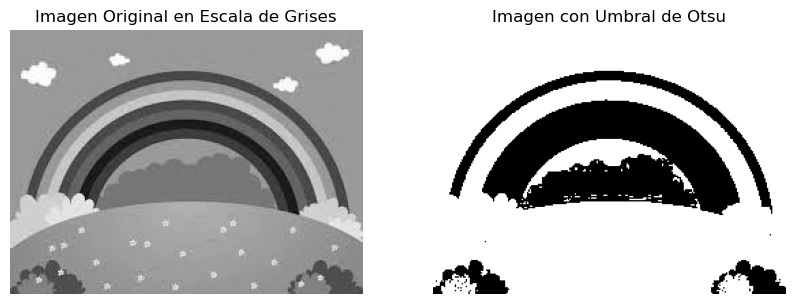

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

umbral_otsu, imagen_otsu = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original en Escala de Grises')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen con Umbral de Otsu')
plt.imshow(imagen_otsu, cmap='gray')
plt.axis('off')

plt.show()


APLICACIÓN AMPLIA DEL MÉTODO OTSU - AUTOR MINGHAO NING
https://medium.com/@MinghaoNing/otsus-method-db49e2f85093

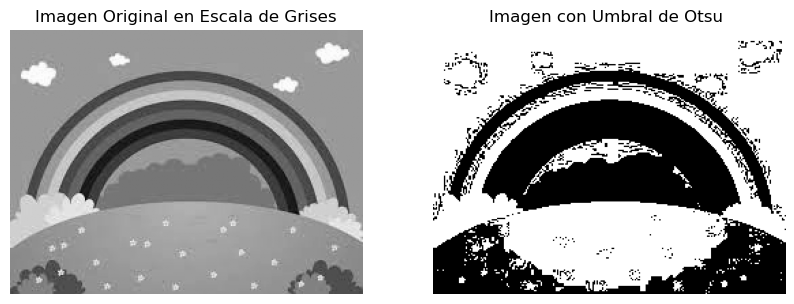

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('2.png', 0)

img_flattened = imagen.flatten()

hist_counts, bin_edges = np.histogram(img_flattened, bins=256, range=(0, 256))

lista_brillo = bin_edges[1:].astype(int)

normed_hist_counts = hist_counts / hist_counts.sum()

probabilidad_ponderada = lista_brillo * normed_hist_counts

omiga_arr = normed_hist_counts.cumsum()
Ex_arr = probabilidad_ponderada.cumsum()
EX = Ex_arr[-1]  
def calcular_varianza_entre_grupos(umbral):
    eps = 1e-10  
    omiga0 = omiga_arr[umbral]
    Ex0 = Ex_arr[umbral]
    varianza_entre_grupos = (omiga0 * (Ex0 - EX) ** 2) / (1 - omiga0 + eps)
    return varianza_entre_grupos

varianza_entre_clases_arr = np.array([calcular_varianza_entre_grupos(t) for t in range(1, 256)])

umbral_otsu = np.argmax(varianza_entre_clases_arr)

_, imagen_otsu = cv2.threshold(imagen, umbral_otsu, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title('Imagen Original en Escala de Grises')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen con Umbral de Otsu ')
plt.imshow(imagen_otsu, cmap='gray')
plt.axis('off')

plt.show()

APLICACIÓN SIMPLE DEL MÉTODO OTSU -  POR: muthukrishnan
https://github.com/muthuspark/ml_research/blob/master/Otsu%20Thresholding%20implementation.ipynb

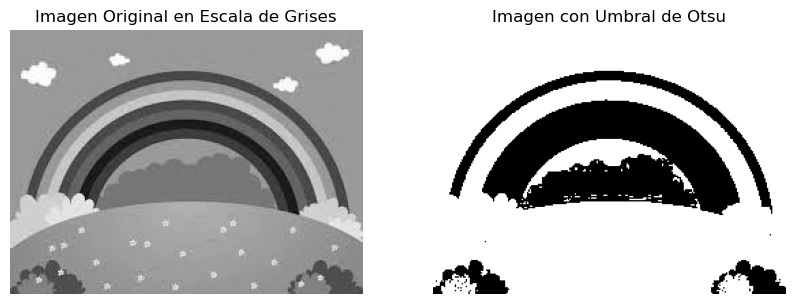

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

histograma, bin_edges = np.histogram(imagen, bins=256, range=(0, 256))

normed_hist_counts = histograma / histograma.sum()

omega_arr = normed_hist_counts.cumsum()
mu_arr = (np.arange(256) * normed_hist_counts).cumsum()

media_total = mu_arr[-1]

sigma_b_squared = ((media_total * omega_arr - mu_arr) ** 2) / (omega_arr * (1 - omega_arr) + 1e-10)
umbral_otsu = np.argmax(sigma_b_squared)

_, imagen_otsu = cv2.threshold(imagen, umbral_otsu, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original en Escala de Grises')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen con Umbral de Otsu')
plt.imshow(imagen_otsu, cmap='gray')
plt.axis('off')

plt.show()
